In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential, Model

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(X_train, y_train), (X_test, _) = load_data()

In [4]:
X_train.shape

(60000, 28, 28)

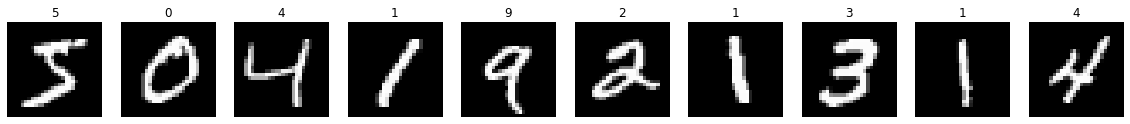

In [5]:
num = 10
fig, ax = plt.subplots(1, num, figsize=(20,5))
for i in range(num):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(y_train[i])
plt.show()

In [6]:
X_train_proc = X_train.reshape(X_train.shape[0],-1) / 255 - 0.5
X_test_proc = X_train.reshape(X_test.shape[0],-1) / 255 - 0.5

In [7]:
encoder = Sequential()
encoder.add(L.InputLayer(28*28))
encoder.add(L.Dense(28*28, activation='relu'))
encoder.add(L.Dense(64))
encoder.add(L.Dense(32))

In [8]:
decoder = Sequential()
decoder.add(L.InputLayer((32,)))
decoder.add(L.Dense(32))
decoder.add(L.Dense(64))
decoder.add(L.Dense(28*28))

In [9]:
inp = L.Input(28*28)
code = encoder(inp)
reconstruction = decoder(code)
model = Model(inputs=inp, outputs=reconstruction)

In [10]:
model.compile(optimizer='adamax', loss='mse')

In [11]:
model.fit(X_train_proc, X_train_proc, epochs=15, verbose=0)

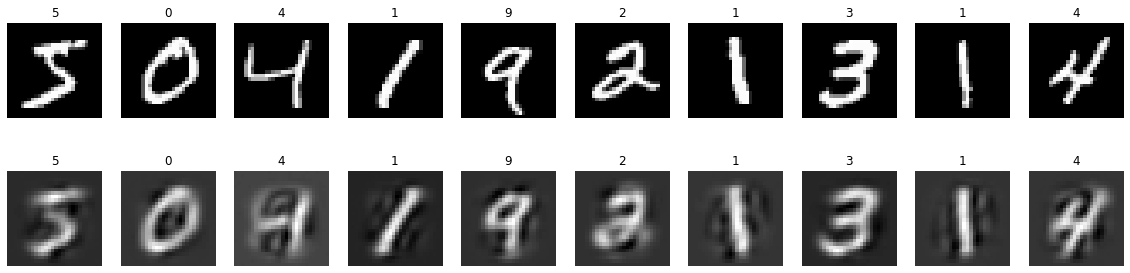

In [12]:
num = 10
fig, ax = plt.subplots(2, num, figsize=(20,5))
for i in range(num):
    ax[0][i].imshow(X_train_proc[i].reshape(28,28), cmap='gray')
    ax[0][i].axis('off')
    ax[0][i].set_title(y_train[i])
    ax[1][i].imshow(model.predict(X_train_proc[i].reshape(1,-1)).reshape(28,28), cmap='gray')
    ax[1][i].axis('off')
    ax[1][i].set_title(y_train[i])
plt.show()

# Автокодировщики с использованием сверточных сетей

In [62]:
encoder_conv = Sequential()
encoder_conv.add(L.InputLayer((28,28,1)))
encoder_conv.add(L.Conv2D (16, (3,3), padding='same', activation='relu'))
encoder_conv.add(L.Conv2D (8, (3,3), padding='same', activation='relu'))
encoder_conv.add(L.Flatten())
encoder_conv.add(L.Dense(32))

In [63]:
decoder_conv = Sequential()
decoder_conv.add(L.InputLayer(32,))
decoder_conv.add(L.Reshape(28,28,1))
decoder_conv.add(L.Conv2DTranspose(8, kernel_size=3, padding='same', activation='relu'))
decoder_conv.add(L.Conv2DTranspose(16, kernel_size=3, padding='same', activation='relu'))
decoder_conv.add(L.Conv2D(1, (3,3), activation='sigmoid', padding='same'))

TypeError: __init__() takes 2 positional arguments but 4 were given

In [36]:
inp = L.Input(shape=(28,28,1))
code = encoder_conv(inp)
reconstruction_conv = decoder_conv(code)
model_conv = Model(inputs=inp, outputs=reconstruction_conv)

In [37]:
model_conv.compile(optimizer='adamax', loss='mse')

In [39]:
model_conv.fit(X_train, X_train, epochs=2, verbose=1)

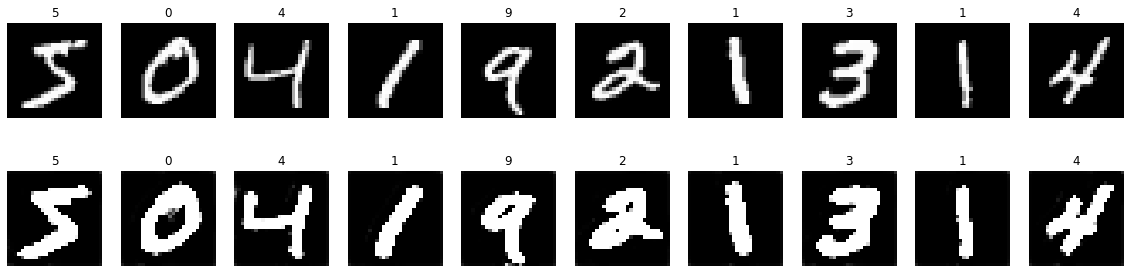

In [61]:
num = 10
fig, ax = plt.subplots(2, num, figsize=(20,5))
for i in range(num):
    ax[0][i].imshow(X_train[i], cmap='gray')
    ax[0][i].axis('off')
    ax[0][i].set_title(y_train[i])
    ax[1][i].imshow(model_conv.predict(X_train[i:i+1]).reshape(28,28), cmap='gray')
    ax[1][i].axis('off')
    ax[1][i].set_title(y_train[i])
plt.show()

# Генератор случайных изображений

In [15]:
inputs_ = L.Input(32)
outputs_ = decoder(inputs_)
gen_model = Model(inputs=inputs_, outputs=outputs_)

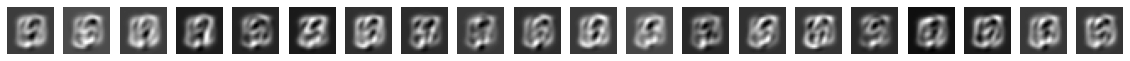

In [21]:
num = 20
fig, ax = plt.subplots(1, num, figsize=(20,5))
for i in range(num):
    rnd_inp = np.random.random(32)
    result = gen_model.predict(rnd_inp.reshape(1,-1))
    ax[i].imshow(result.reshape(28,28), cmap='gray')
    ax[i].axis('off')

plt.show()

# Автокодировщик для лиц

# Найти похожие картинки

In [14]:
np.random.random(3)

array([0.01051176, 0.0289606 , 0.73958193])

- http://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt
- http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
- http://vis-www.cs.umass.edu/lfw/lfw.tgz